<a href="https://colab.research.google.com/github/DishaArsude/Tamizan-Skills-Internship-ML-AI-PROJECT-5/blob/main/Project_5_Movie_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')


In [ ]:
df = pd.merge(ratings, movies, on='movieId')

user_movie_matrix = df.pivot_table(index='userId', columns='title', values='rating')

user_movie_matrix_filled = user_movie_matrix.fillna(0)


In [ ]:
item_similarity = cosine_similarity(user_movie_matrix_filled.T)
item_similarity_df = pd.DataFrame(item_similarity, index=user_movie_matrix.columns, columns=user_movie_matrix.columns)


In [ ]:
def recommend_movies(movie_name, top_n=5):
    if movie_name not in item_similarity_df:
        return f"❌ Movie '{movie_name}' not found in database."
    similar_scores = item_similarity_df[movie_name].sort_values(ascending=False)[1:top_n+1]
    return similar_scores


In [ ]:
movie = "Toy Story (1995)"
print(f"\n🎬 Recommendations similar to '{movie}':")
print(recommend_movies(movie, top_n=5))


🎬 Recommendations similar to 'Toy Story (1995)':
title
Star Wars: Episode VI - Return of the Jedi (1983)                                 0.629837
Star Wars: Episode IV - A New Hope (1977)                                         0.628777
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    0.586057
Independence Day (a.k.a. ID4) (1996)                                              0.578368
Back to the Future (1985)                                                         0.577313
Name: Toy Story (1995), dtype: float64


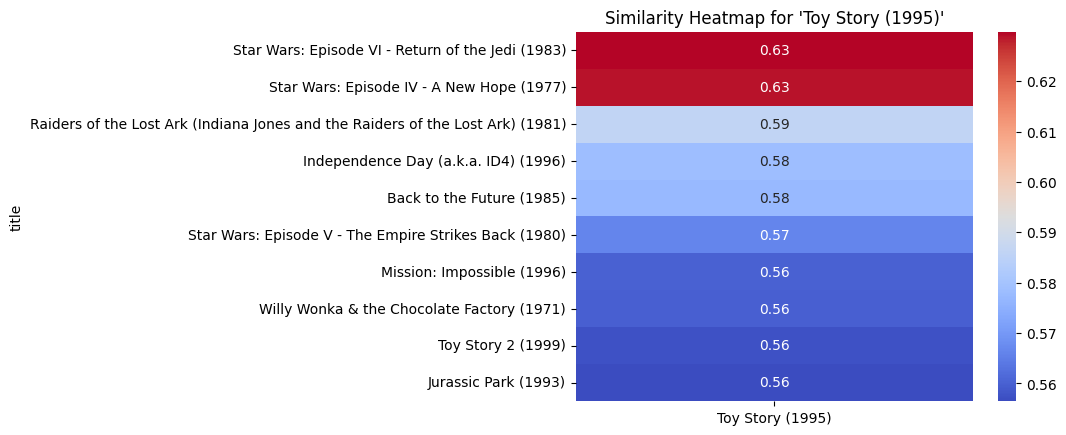

In [ ]:
# Plot heatmap for top 10 similar movies
def plot_similarity(movie_name):
    if movie_name not in item_similarity_df:
        print("Movie not found!")
        return
    sim_scores = item_similarity_df[movie_name].sort_values(ascending=False)[1:11]
    sns.heatmap(sim_scores.to_frame(), annot=True, cmap='coolwarm')
    plt.title(f"Similarity Heatmap for '{movie_name}'")
    plt.show()

plot_similarity("Toy Story (1995)")
